In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.__version__
fol_data = '../offline_data'

In [5]:
data = pd.Series(np.arange(10)**2)
data

0     0
1     1
2     4
3     9
4    16
5    25
6    36
7    49
8    64
9    81
dtype: int32

In [6]:
data.values

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)

In [7]:
data.index

RangeIndex(start=0, stop=10, step=1)

In [9]:
data[3]

9

In [11]:
data = pd.Series([1, 2, 3, 4],index=['a','b','c','d'])
data

a    1
b    2
c    3
d    4
dtype: int64

In [12]:
print(data[0])
print(data['a'])

1
1


In [13]:
print(data['a':'c'])

a    1
b    2
c    3
dtype: int64


In [16]:
data1 = pd.Series('repeat',index=np.arange(5))
data1

0    repeat
1    repeat
2    repeat
3    repeat
4    repeat
dtype: object

In [19]:
data2 = pd.Series([0,5,3,1,6],index=np.arange(5))
df = pd.DataFrame({'rep':data1,'unknown':data2})
df

,rep,unknown
0,repeat,0
1,repeat,5
2,repeat,3
3,repeat,1
4,repeat,6


In [20]:
df['unknown']

0    0
1    5
2    3
3    1
4    6
Name: unknown, dtype: int64

In [26]:
csv = fol_data + '/uscities.csv'
df = pd.read_csv(csv)
df.keys()

Index(['city', 'city_ascii', 'state_id', 'state_name', 'county_fips',
       'county_name', 'lat', 'lng', 'population', 'density', 'source',
       'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id'],
      dtype='object')

<ipython-input-31-33f47e4477fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lng'][I] -= 360


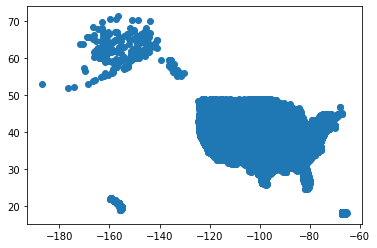

In [31]:
I = df['lng'] > 0
df['lng'][I] -= 360
plt.scatter(df['lng'],df['lat'])

In [33]:
indA = pd.Index([1,3,5,7,9])
indB = pd.Index([2,3,5,7,11])
indA & indB # intersection

Int64Index([3, 5, 7], dtype='int64')

In [34]:
indA | indB # union

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [36]:
indA ^ indB # symmetric difference (wow, what's not share between, oppposite of intersection)

Int64Index([1, 2, 9, 11], dtype='int64')

In [38]:
data = pd.Series([1, 2, 3, 4],index=['a','b','c','d'])
print(data['b'])
'a' in data

2


True

In [39]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [41]:
list(data.items())

[('a', 1), ('b', 2), ('c', 3), ('d', 4)]

In [42]:
want = ['a','c']
data[want]

a    1
c    3
dtype: int64

In [45]:
data.loc['a'] # Always explicit indexing
#data.loc[0] <- this won't work!

1

In [47]:
data.iloc[:2] #Implicit indexing always

a    1
b    2
dtype: int64

In [51]:
csv = fol_data + '/uscities.csv'
df = pd.read_csv(csv)
print([np.mean(df.lat), np.mean(df.lng)])



[38.61399456207233, -92.9723933587412]


In [62]:
df.iloc[:3,:2].head() # Slicing in both dimensions! Using implicit

,city,city_ascii
0,New York,New York
1,Los Angeles,Los Angeles
2,Chicago,Chicago


In [72]:
#plt.plot(df.population)
mask_big = df.population > 5e6
mask_big
df['city'][mask_big]

0        New York
1     Los Angeles
2         Chicago
3           Miami
4          Dallas
5    Philadelphia
6         Houston
7         Atlanta
8      Washington
Name: city, dtype: object

In [76]:
dfb = df[mask_big]
dfb.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807,3276,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203,4574,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545,5019,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938,1526,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840019440


(array([1.5589e+04, 6.6690e+03, 2.4940e+03, 1.2750e+03, 7.9100e+02,
        4.9000e+02, 3.1500e+02, 2.1600e+02, 1.4800e+02, 6.8000e+01,
        6.6000e+01, 4.3000e+01, 4.4000e+01, 2.9000e+01, 1.7000e+01,
        1.6000e+01, 1.3000e+01, 6.0000e+00, 1.0000e+01, 2.0000e+00,
        4.0000e+00, 6.0000e+00, 6.0000e+00, 2.0000e+00, 3.0000e+00,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

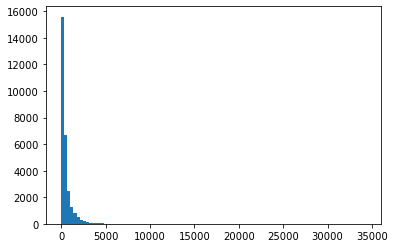

In [79]:
plt.hist(df.density,100)

In [52]:
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'